In [1]:
import math
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow_datasets as tfds

In [2]:
import logging
logger = tf.get_logger()
logger.setLevel(logging.ERROR)

In [3]:
dataset, metadata = tfds.load("fashion_mnist", as_supervised=True, with_info=True)
train_set, test_set = dataset["train"], dataset["test"]

In [4]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal',      'Shirt',   'Sneaker',  'Bag',   'Ankle boot']

In [5]:
m_train = metadata.splits['train'].num_examples
m_test = metadata.splits['test'].num_examples
print("Training set examples:",m_train)
print("Training set examples:",m_test)

Training set examples: 60000
Training set examples: 10000


In [6]:
def normalize(images, labels):
    images = tf.cast(images, tf.float32)
    images /= 255
    return images, labels
train_set = train_set.map(normalize)
test_set = test_set.map(normalize)

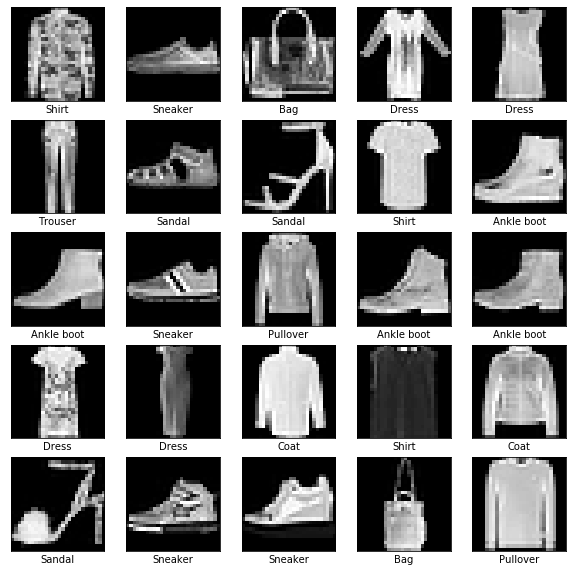

In [7]:
i = 0
plt.figure(figsize=(10,10))
for img, label in train_set.take(25):
    img = img.numpy().reshape(28,28)
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img, cmap=plt.cm.gray)
    plt.xlabel(class_names[label])
    i+=1

In [8]:
L = [
    tf.keras.layers.Conv2D(32, (3,3), padding='same', activation=tf.nn.relu, input_shape=(28,28,1)),
    tf.keras.layers.MaxPooling2D((2,2), strides=2),
    tf.keras.layers.Conv2D(64, (3,3), padding='same', activation=tf.nn.relu),
    tf.keras.layers.MaxPooling2D((2,2), strides=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
]
model = tf.keras.Sequential(L)

In [9]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [10]:
batch_size = 32
train_set = train_set.repeat().shuffle(m_train).batch(batch_size)
test_set = test_set.batch(batch_size)

In [11]:
model.fit(train_set, epochs=10, steps_per_epoch=math.ceil(m_train / batch_size))

Train for 1875 steps
Epoch 1/10
1875/1875 [==============================] - 42s 22ms/step - loss: 0.3863 - accuracy: 0.8608
Epoch 2/10
1875/1875 [==============================] - 36s 19ms/step - loss: 0.2515 - accuracy: 0.9083
Epoch 3/10
1875/1875 [==============================] - 37s 20ms/step - loss: 0.2063 - accuracy: 0.9234
Epoch 4/10
1875/1875 [==============================] - 38s 20ms/step - loss: 0.1770 - accuracy: 0.9344
Epoch 5/10
1875/1875 [==============================] - 37s 20ms/step - loss: 0.1533 - accuracy: 0.9427
Epoch 6/10
1875/1875 [==============================] - 37s 20ms/step - loss: 0.1252 - accuracy: 0.9539
Epoch 7/10
1875/1875 [==============================] - 37s 20ms/step - loss: 0.1045 - accuracy: 0.9615
Epoch 8/10
1875/1875 [==============================] - 37s 20ms/step - loss: 0.0900 - accuracy: 0.9671
Epoch 9/10
1875/1875 [==============================] - 37s 20ms/step - loss: 0.0751 - accuracy: 0.9725
Epoch 10/10
1875/1875 [====================

In [13]:
test_loss, test_accuracy = model.evaluate(test_set, steps=math.ceil(m_test/32))
print("Test set accuracy:",test_accuracy)

313/313 [==============================] - 2s 7ms/step - loss: 0.3139 - accuracy: 0.9172
Test set accuracy: 0.9172


In [14]:
for img, labels in test_set.take(1):
    img = img.numpy()
    labels = labels.numpy()
    predictions = model.predict(img)
print(predictions.shape)
print(predictions[0])

(32, 10)
[6.7726043e-09 2.9465216e-13 6.3288899e-06 2.0342948e-10 3.4507196e-03
 1.4376199e-10 9.9654299e-01 3.2167410e-10 5.9754651e-14 2.2487816e-09]


In [15]:
print("Prediction:",class_names[np.argmax(predictions[0])])
print("Actual label:",class_names[np.argmax(labels[0])])

Prediction: Shirt
Actual label: T-shirt/top


In [27]:
def plot_image(i, predictions, labels, images):
    prediction, label, image = predictions[i], labels[i], images[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(image[:,:,0], cmap=plt.cm.gray)
    predicted_label = np.argmax(prediction)
    if predicted_label == label:
        color = 'blue'
    else:
        color = 'red'
    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                        100*np.max(predictions),
                                        class_names[label]),
               color=color)

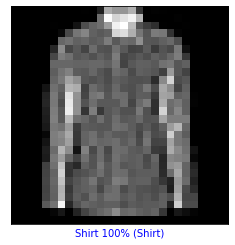

In [29]:
plot_image(0,predictions, labels, img)

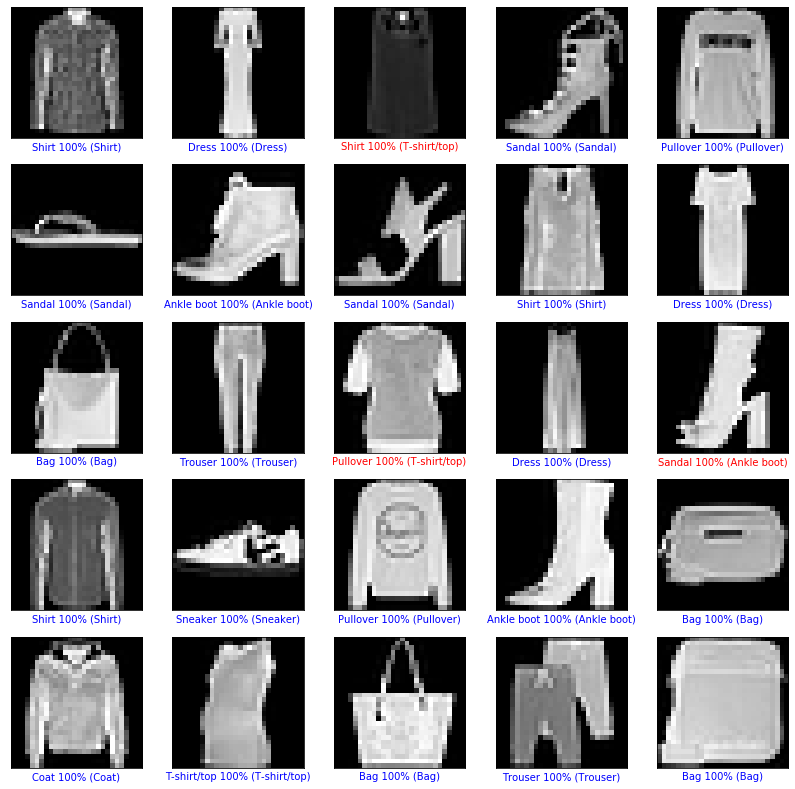

In [33]:
rows, cols = 5, 5
fig = plt.figure(figsize=(14,14))
for i in range(rows*cols):
    plt.subplot(rows, cols, i+1)
    plot_image(i,predictions,labels,img)